<a href="https://colab.research.google.com/github/Sirmuchai/Machine-Learning/blob/main/Week_4__Project_3_Introduction_to_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression Project

## Problem Statement
Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the
new plans (from the project for the Statistical Data Analysis course). For this
classification task, you need to develop a model that will pick the right plan. Since you’ve
already performed the data preprocessing step, you can move straight to creating the
model.
Develop a model with the highest possible accuracy. In this project, the threshold for
accuracy is `0.75`. Check the accuracy using the test dataset.
1. Open and look through the data file.
2. Split the source data into a training set, a validation set, and a test set.
3. Investigate the quality of different models by changing hyperparameters. Briefly
describe the findings of the study.
4. Check the quality of the model using the test set.
5. Additional task: sanity check the model. This data is more complex than what
you’re used to working with, so it's not an easy task. We'll take a closer look at it
later.

**Dataset**
* Dataset URL (CSV File): https://bit.ly/UsersBehaviourTelco

# Data Importation


In [ ]:
# Module to be used

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# reading dataset
telco_df = pd.read_csv("https://bit.ly/UsersBehaviourTelco")

telco_df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## Data Exploration

In [ ]:
# dataset shape

telco_df.shape

(3214, 5)

In [ ]:
# Dataset informations
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
# checking for null values
telco_df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

## Data Visualization

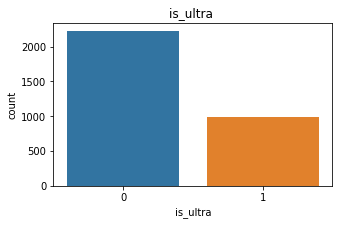

In [ ]:
# is_ultra  distribution our data
plt.figure(figsize=(5,3))
sns.countplot(x = telco_df['is_ultra'])
plt.title("is_ultra ")
plt.show()

# Data Preparation

In [ ]:
features = telco_df.drop('is_ultra', axis =1)
features.head(2)

,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96


In [ ]:
#Target dataset
target = telco_df['is_ultra']
target.head(2)

0    0
1    0
Name: is_ultra, dtype: int64

## Spliting Training and Test data

In [ ]:
#Spliting features and target to train and test data
feature_train , feature_test, target_train, target_test = train_test_split(features, target, random_state=17, test_size=0.2)

print(f"Features Train: {feature_train.shape}")
print(f"Features Test: {feature_test.shape}")
print(f"Target Train: {target_train.shape}")
print(f"Target Test: {target_test.shape}")

Features Train: (2571, 4)
Features Test: (643, 4)
Target Train: (2571,)
Target Test: (643,)


## Model Training

### Linear Regression

In [ ]:
LR_model = LinearRegression()
LR_model.fit(feature_train, target_train)

lr_predict = LR_model.predict(feature_test)

### Decision Tree Regression

In [ ]:
DTR_model = DecisionTreeRegressor()
DTR_model.fit(feature_train, target_train)

dtr_predict = DTR_model.predict(feature_test)

### Random Forest Regression

In [ ]:
RTR_model = RandomForestRegressor()
RTR_model.fit(feature_train, target_train)

rtr_predict = RTR_model.predict(feature_test)

## Model Evaluation

In [ ]:
lr_mse = mean_squared_error(target_test, lr_predict)
dtr_mse = mean_squared_error(target_test, dtr_predict)
rtr_mse = mean_squared_error(target_test, rtr_predict)

In [ ]:
print(f"The MSE for our Linear Regression model is: {lr_mse}")
print(f"The MSE for our Decision Tree Regression model is: {dtr_mse}")
print(f"The MSE for our Random Forest Regression model is: {rtr_mse}")

The MSE for our Linear Regression model is: 0.19233695063613304
The MSE for our Decision Tree Regression model is: 0.27682737169517885
The MSE for our Random Forest Regression model is: 0.15260855365474338


## Tuning models

### Tuned Decision Tree Regression

In [ ]:
tun_DTR_model = DecisionTreeRegressor(max_depth=70,
                                      max_features='auto',
                                      min_samples_leaf= 7,
                                      min_samples_split=10)
tun_DTR_model.fit(feature_train, target_train)

tun_dtr_predict = tun_DTR_model.predict(feature_test)

In [ ]:
tun_dtr_mse = mean_squared_error(target_test, tun_dtr_predict)

In [ ]:
print(f"The MSE for our Decision Tree Regression model is: {tun_dtr_mse}")

The MSE for our Decision Tree Regression model is: 0.1861045217490483


### Tuned Random Forest Regression

In [ ]:
tun_RTR_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False)
tun_RTR_model.fit(feature_train, target_train)

tun_rtr_predict = tun_RTR_model.predict(feature_test)

In [ ]:
tun_rtr_mse = mean_squared_error(target_test, tun_rtr_predict)

In [ ]:
print(f"The MSE for our Tuned Random Tree Regression model is: {tun_rtr_mse}")

The MSE for our Tuned Random Tree Regression model is: 0.14796346110980826


# Conclusion

* Random Forest Regression has the least mean square error